# Getting Started with EEG Data

In 2011-2012, the brain-computer interface (BCI) research group at Colorado State University recorded EEG signals from subjects in our lab and in their homes, using three different EEG systems. One goal of this work is to determine if inexpensive EEG systems (about $7,000) are as effective as more expensive ones (about $40,000) for conducting BCI experiments in the home.

On this page, we summarize the steps you can follow to download some of the data, load it into an ipython environment, and visualize it. We also show examples of looking at P300 ERP’s.

# Downloading EEG Data

EEG data from multiple subjects can be downloaded from our Public BCI Data site. Let’s select the data files for the first subject in each device column, for subjects recorded in our lab.

![Data download page](http://www.cs.colostate.edu/eeg/data/json/doc/tutorial/_build/html/_images/eegDownload.png)

# Extract the downloaded data
The zip file should contain six zipped data files. Extract the files, for example using the following commands:

```
> cd ~/Download

> unzip eeg.zip
Archive:  eeg.zip
 extracting: s20-activetwo-gifford-unimpaired.json.zip
 extracting: s21-activetwo-gifford-unimpaired.json.zip
 extracting: s20-gammasys-gifford-unimpaired.json.zip
 extracting: s21-gammasys-gifford-unimpaired.json.zip
 extracting: s20-mindset-gifford-unimpaired.json.zip
 extracting: s21-mindset-gifford-unimpaired.json.zip

> rm eeg.zip

> ls -l --block-size=M *json*
-rw-r--r-- 1 ... 84M Mar 12 10:50 s20-activetwo-gifford-unimpaired.json.zip
-rw-r--r-- 1 ...  5M Mar 12 10:50 s20-gammasys-gifford-unimpaired.json.zip
-rw-r--r-- 1 ... 29M Mar 12 10:50 s20-mindset-gifford-unimpaired.json.zip
-rw-r--r-- 1 ... 80M Mar 12 10:51 s21-activetwo-gifford-unimpaired.json.zip
-rw-r--r-- 1 ...  5M Mar 12 10:51 s21-gammasys-gifford-unimpaired.json.zip
-rw-r--r-- 1 ... 28M Mar 12 10:52 s21-mindset-gifford-unimpaired.json.zip

> unzip s20-gammasys-gifford-unimpaired.json.zip
Archive:  s20-gammasys-gifford-unimpaired.json.zip
  inflating: s20-gammasys-gifford-unimpaired.json

> unzip s20-mindset-gifford-unimpaired.json.zip
Archive:  s20-mindset-gifford-unimpaired.json.zip
  inflating: s20-mindset-gifford-unimpaired.json

> unzip s20-activetwo-gifford-unimpaired.json.zip
Archive:  s20-activetwo-gifford-unimpaired.json.zip
  inflating: s20-activetwo-gifford-unimpaired.json

> rm s20*zip
```

The unzipped data can loaded into an ipython environment.

In [3]:
# Show matplotlib plots in this notebook
%matplotlib inline

# Imports
import matplotlib.pyplot as plt
import numpy as np
import json
import scipy.signal as sig
import bandpass as bp

In [4]:
# Open the data file
gammasys_data_file = open('data/s20-gammasys-gifford-unimpaired.json','r')

# Parse data to JSON
data = json.load(gammasys_data_file)

The variable data is a list of dictionaries, each with the same keys.

In [5]:
len(data)

8

In [6]:
data[0].keys()

dict_keys(['device', 'impairment', 'eeg', 'location', 'date', 'protocol', 'sample rate', 'channels', 'subject', 'notes'])

Here is a handy function to show keys and their values in each data element.

In [7]:
def summarize(datalist):
    for i,element in enumerate(datalist):
        keys = list(element.copy().keys())
        print('\nData set', i)
        keys.remove('eeg')
        for key in keys:
            print('  {}: {}'.format(key,element[key]))
        eegtrials = element['eeg']
        shape = np.array(eegtrials['trial 1']).shape
        print ('  eeg: {:d} trials, each a matrix with {:d} rows and approximately {:d} columns'.format(len(eegtrials), shape[0], shape[1]))

In [8]:
summarize(data)


Data set 0
  sample rate: 256
  subject: 20
  notes: 
  device: GAMMAsys
  date: [2012, 3, 8]
  location: gifford
  impairment: none
  protocol: 3minutes
  channels: ['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']
  eeg: 1 trials, each a matrix with 9 rows and approximately 46330 columns

Data set 1
  sample rate: 256
  subject: 20
  notes: 
  device: GAMMAsys
  date: [2012, 3, 8]
  location: gifford
  impairment: none
  protocol: grid-p
  channels: ['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']
  eeg: 1 trials, each a matrix with 9 rows and approximately 17692 columns

Data set 2
  sample rate: 256
  subject: 20
  notes: 
  device: GAMMAsys
  date: [2012, 3, 8]
  location: gifford
  impairment: none
  protocol: grid-b
  channels: ['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']
  eeg: 1 trials, each a matrix with 9 rows and approximately 17695 columns

Data set 3
  sample rate: 256
  subject: 20
  notes: 
  device: GAMMAsys
  date: [2012, 3, 8]
  location: gifford
  impairment: no

# Plotting some EEG

The first element of the data list has key-value pair `protocol: 3minutes`, meaning that this element contains 3 minutes of EEG recorded while the subject was asked to relax and look at the computer screen. Let’s take a look at 2 seconds of this data.

The EEG consists of one matrix with 9 rows and 46,342 columns. The 9 rows correspond to the channels `channels:  ['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']` plus one more channel that is used to mark stimuli onset and offset, which is not used for the 3 minute protocol. The number of samples (in columns) in one second depends on the sample rate, which for this device, `device: GAMMAsys`, is 256 samples per second, `sample rate: 256`. Let’s plot data from all 9 channels for columns 1,000 to 1,512.

In [9]:
first = data[0]
eeg = np.array(first['eeg']['trial 1'])
eeg.shape

(9, 46330)

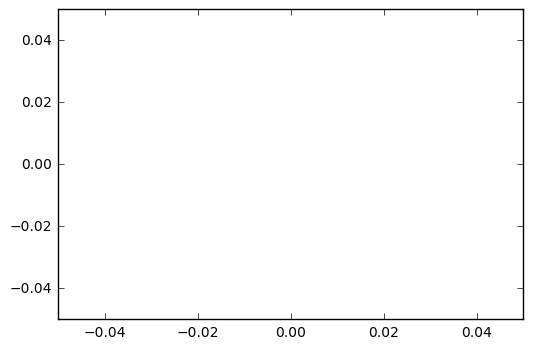

In [10]:
# Using ending semicolon to suppress output of plotting functions.
plt.figure(1);

plt.axis('tight');

plt.plot(eeg[:,4000:4512].T);

Kind of hard to see each channel. Let’s spread them out and not plot the constant, unused, 9th channel. Also, we can add a legend with the channel names. If we reverse the vertical order of the channel plots, they will correspond with the vertical order of the channel names.

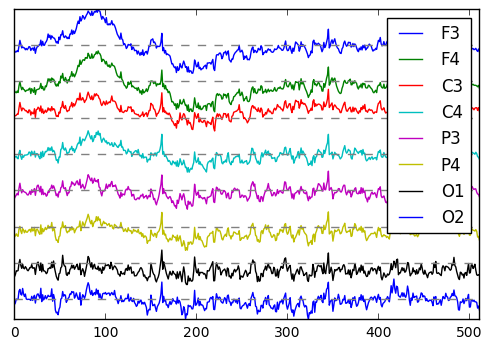

In [11]:
plt.figure(2);

plt.plot(eeg[:8,4000:4512].T + 80*np.arange(7,-1,-1));

plt.plot(np.zeros((512,8)) + 80*np.arange(7,-1,-1),'--',color='gray');

plt.yticks([]);

plt.legend(first['channels']);

plt.axis('tight');

# Again, for EEG from ActiveTwo and Mindset Systems¶

Now let’s summarize the data from the other two systems. First, rename data to dataGammasys.

In [12]:
dataGammasys = data

dataActivetwo = json.load(open('data/s20-activetwo-gifford-unimpaired.json','r'))

dataMindset = json.load(open('data/s20-mindset-gifford-unimpaired.json','r'))

summarize(dataMindset[0:2])


Data set 0
  target indicator: []
  sample rate: 512
  subject: 20
  notes: 
  device: mindset
  impairment: none
  location: gifford
  date: [2012, 4, 7]
  protocol: 3minutes
  channels: ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'CZ', 'FZ', 'PZ']
  eeg: 1 trials, each a matrix with 24 rows and approximately 92160 columns

Data set 1
  target indicator: [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
  sample rate: 512
  subject: 20
  notes: 
  device: mindset
  impairment: none
  location: gifford
  date: [2012, 4, 7]
  protocol: grid-p
  channels: ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'CZ', 'FZ', 'PZ']
  eeg: 1 trials, each a matrix with 24 rows and approximately 36352 columns


This shows that the Mindset has 19 channels of EEG, but the EEG matrix has 24 rows. The first 19 rows are the EEG channels. Let’s plot them.

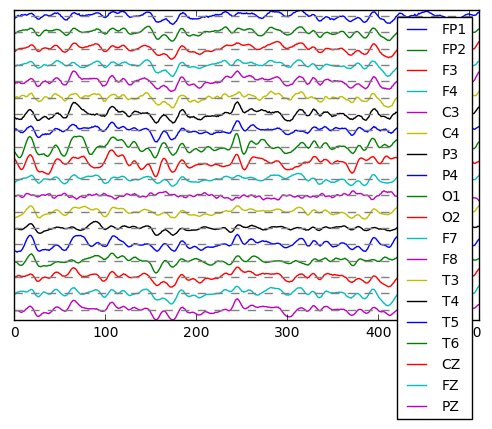

In [13]:
eegMindset = np.array(dataMindset[0]['eeg']['trial 1'])

plt.figure();

plt.plot(eegMindset[:19,4000:4512].T + 30*np.arange(18,-1,-1));

plt.plot(np.zeros((512,19)) + 30*np.arange(18,-1,-1),'--',color='gray');

plt.yticks([]);

plt.legend(dataMindset[0]['channels'], prop={'size':10});

plt.axis('tight');

Now for the data from the ActiveTwo system. First, let’s see which element in the list is for the 3minutes protocol.

In [14]:
summarize(dataActivetwo[0:2])


Data set 0
  sample rate: 1024.0
  subject: 20
  notes: 
  device: activetwo
  date: [2012, 2, 23]
  location: gifford
  impairment: none
  protocol: mentaltasks
  channels: ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status']
  eeg: 1 trials, each a matrix with 41 rows and approximately 334848 columns

Data set 1
  sample rate: 1024.0
  subject: 20
  notes: 
  device: activetwo
  date: [2012, 2, 23]
  location: gifford
  impairment: none
  protocol: 3minutes
  channels: ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status']
  eeg: 1 trial

In [15]:
eegActivetwo = np.array(dataActivetwo[1]['eeg']['trial 1'])

eegActivetwo.shape

(41, 185344)

This data matrix contains 41 rows. The list of channels is the 41 names

In [16]:
dataActivetwo[1]['channels']

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz',
 'EXG1',
 'EXG2',
 'EXG3',
 'EXG4',
 'EXG5',
 'EXG6',
 'EXG7',
 'EXG8',
 'Status']

The channels named EXG1 through EXG6 contain non-EEG data as follows:

| Channel | Index | Electrode |
|--- | --- | --- |
| EXG1 | 32 | EOG vertical left |
| EXG2 | 33| EOG vertical right |
| EXG3 | 34| EOG horizontal left |
| EXG4 | 35| EOG horizontal right |
| EXG5 | 36| earlobe left |
| EXG6 | 37| earlobe right |

Typically, the EEG channels (indices 0 through 31) are referenced to the earlobes, after removing the linear trend. That’s easy.

In [17]:
eegActivetwo = sig.detrend(eegActivetwo,1)

ref = np.mean(eegActivetwo[36:38,:],axis=0).reshape((1,-1))

eeg2 = eegActivetwo[:32,:] - ref

Now we can plot all 32 EEG channels.

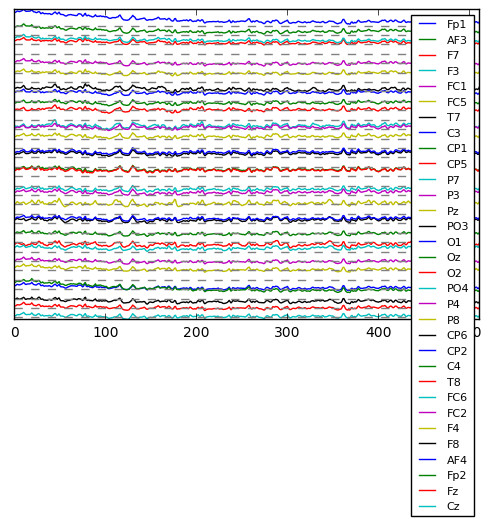

In [18]:
plt.figure();

plt.plot(eeg2[:,4000:4512].T + 150*np.arange(31,-1,-1))

plt.plot(np.zeros((512,32)) + 150*np.arange(31,-1,-1),'--',color='gray');

plt.yticks([]);

plt.legend(dataActivetwo[0]['channels'][:32], prop={'size':8});

plt.axis('tight');

Here is the plot of EEG at the end of Getting Started with EEG Data.

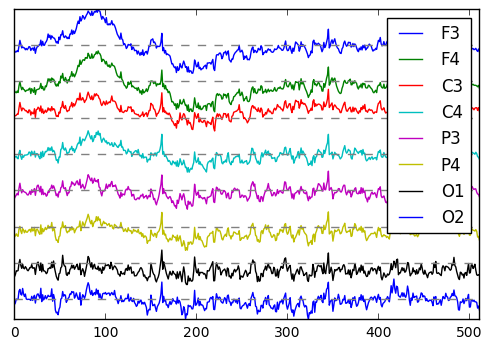

In [19]:
plt.figure();

plt.plot(eeg[:8,4000:4512].T + 80*np.arange(7,-1,-1));

plt.plot(np.zeros((512,8)) + 80*np.arange(7,-1,-1),'--',color='gray');

plt.yticks([]);

plt.legend(first['channels']);

plt.axis('tight');

Looks like we have an eye-blink artifact near sample 100.

# Bandass Filtering

One way to decrease the effect of eye blinks is to filter the data. Here is a link to the file bandpass.py, adapted from ObsPy, that defines the function bandpass. We can use it to pass frequencies from 1 to 30 Hz as follows:

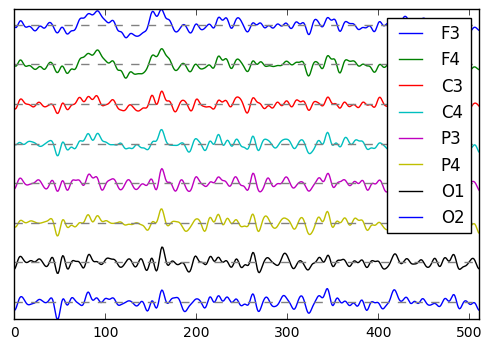

In [20]:
data = json.load(open('data/s20-gammasys-gifford-unimpaired.json','r'))

first = data[0]

eeg3 = np.array(first['eeg']['trial 1'])
                
filtered =  bp.bandpass(eeg3[:8,:], 2,30, 256, corners=5, zerophase=True, axis=1)
                
plt.figure(3);

plt.plot(filtered[:8,4000:4512].T + 80*np.arange(7,-1,-1));

plt.plot(np.zeros((512,8)) + 80*np.arange(7,-1,-1),'--',color='gray');

plt.yticks([]);

plt.axis('tight');

plt.legend(first['channels']);

There still seems to be a little eye blink present. Unfortunately, bandpass filtering filters each channel independently, so we cannot use information about the relative amplitudes among the channels. Eye blinks tend to affect channels near the front the scalp more. Methods that extract this pattern would do a better job of removing eye blinks, such as [Signal Fraction Analysis (SFA)](http://www.cs.colostate.edu/eeg/publications/natethesis.pdf).

# P300 Waves for Single Subjects¶
## The Stimulus Channel

Each data file includes EEG recorded during a visual stimulus protocol designed to elicit P300 waves. In the single-letter protocol, subjects looked at a computer screen in the center of which single letters were briefly displayed sequentially, in a random order. In the first trial, they were asked to count the number of times the letter ‘b’ appeared. They were then asked to count the number of times the letter ‘d’ appeared, and then again counting the number of times the letter ‘p’ appeared. These three trials were then repeated, but instead of displaying a single letter, nine letters were simultaneously displayed, in a three-by-three table. Subjects were asked to count the number of times the letter ‘b’ appeared in the center of the table, and similarly the letter ‘d’, and the letter ‘p’.

The letter being presented in the center of the computer screen is indicated in the stimulus channel of the data. For the g.tec g.GAMMAsys data files, this is the ninth channel. We can see this by again plotting all nine channels, but this time of the seventh element (index 6) in the data list, the one for which the protocol is letter-b.

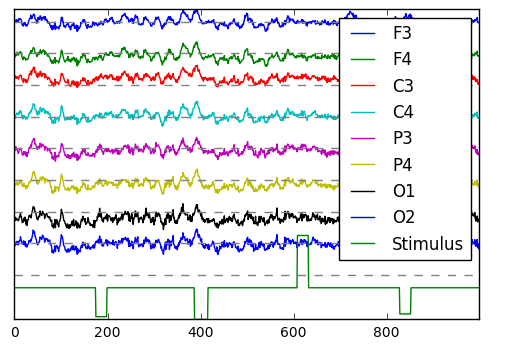

In [22]:
data4 = json.load(open('data/s21-gammasys-gifford-unimpaired.json','r'))

letterd = data4[4]

letterd['protocol']

# Note the transpose here.  Time now advances by row.  Columns are channels
eeg = np.array(letterd['eeg']['trial 1']).T

plt.ion()

plt.figure();

plt.plot(eeg[4000:5000,:9] + 80*np.arange(8,-1,-1));

plt.plot(np.zeros((1000,9)) + 80*np.arange(8,-1,-1),'--',color='gray');

plt.yticks([]);

plt.legend(letterd['channels'] + ['Stimulus']);

plt.axis('tight');

The stimulus channel has the values

In [23]:
np.unique(eeg[:,8])

array([-118., -116., -115., -112., -110., -109., -107., -105., -102.,
       -101.,  -98.,  -97.,  -32.,    0.,  100.])

Its value is 0 only before the trial starts. Of the non-zero values, only one is positive. This represents the letter to be counted—the target letter. The negative values are nontarget letters, except for -32, which is the ASCII code for a blank representing the times when no letter is displayed and the computer screen is black. The ASCII codes for all stimulus channel values can be converted to letters by

In [24]:
[chr(int(n)) for n in np.abs(np.unique(eeg[:,8]))]

['v', 't', 's', 'p', 'n', 'm', 'k', 'i', 'f', 'e', 'b', 'a', ' ', '\x00', 'd']

## Segmenting Data into Time Windows

To investigate the presence or absence of P300 waves, we must segment the data into time windows following each stimulus presentation. First, let’s take a closer look. Plot just the data from the stimulus channel (index 8) and Channel P3 (index 5).

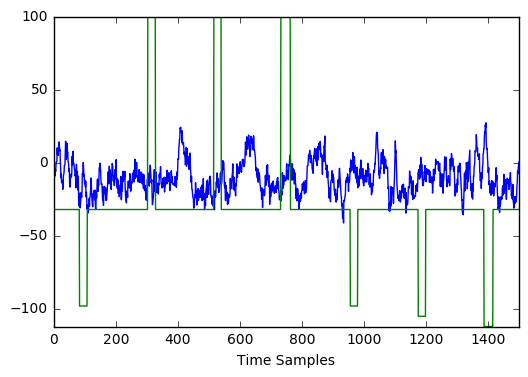

In [25]:
plt.clf();

plt.plot(eeg[3000:4500,[5,8]]);

plt.axis('tight');

plt.xlabel('Time Samples');

It appears that some P300 waves are present following the three positive stimuli. Remember that this is the target letter ‘d’. The positive wave appears roughly 100 samples after the stimulus onset. Since the sampling frequency is 256 Hz, this is about 0.4 seconds, or 400 milliseconds, after the stimulus.

In [26]:
100.0 / letterd['sample rate']

0.390625

Now let’s collect all of the segments from this letter ‘d’ trial. First, find the sample indices where each stimulus starts, collect the displayed letters for each stimulus, and keep track of which stimuli are the target letter.

In [27]:
starts = np.where(np.diff(np.abs(eeg[:,-1])) > 0)[0]

stimuli = [chr(int(n)) for n in np.abs(eeg[starts+1,-1])]

targetLetter = letterd['protocol'][-1]

targetSegments = np.array(stimuli) == targetLetter

len(starts),len(stimuli),len(targetSegments)

(80, 80, 80)

In [30]:
for i,(s,stim,targ) in enumerate(zip(starts,stimuli,targetSegments)):
    print(s,stim,targ)
    if (i+1) % 5 == 0:
        print

247 b False
465 a False
683 p False
899 d True
1119 p False
1337 b False
1551 p False
1771 d True
1985 b False
2207 b False
2427 n False
2643 v False
2863 d True
3082 b False
3302 d True
3515 d True
3731 d True
3955 b False
4174 i False
4386 p False
4607 d True
4827 b False
5043 b False
5262 a False
5482 p False
5695 p False
5919 d True
6135 d True
6351 d True
6567 b False
6787 t False
7007 b False
7223 d True
7443 d True
7659 t False
7879 d True
8095 p False
8317 p False
8533 s False
8749 p False
8971 b False
9187 d True
9402 p False
9626 s False
9843 b False
10059 m False
10275 i False
10495 m False
10711 p False
10930 p False
11147 p False
11367 b False
11583 d True
11805 k False
12023 p False
12235 p False
12458 p False
12679 b False
12893 d True
13109 d True
13333 v False
13551 f False
13770 n False
13987 d True
14202 f False
14418 e False
14635 k False
14855 b False
15075 p False
15290 b False
15514 p False
15731 p False
15945 b False
16162 p False
16382 d True
16599 d True
16818

Good. Now, how long should each time window be? The number of samples between each stimulus onset is

In [31]:
np.diff(starts)

array([218, 218, 216, 220, 218, 214, 220, 214, 222, 220, 216, 220, 219,
       220, 213, 216, 224, 219, 212, 221, 220, 216, 219, 220, 213, 224,
       216, 216, 216, 220, 220, 216, 220, 216, 220, 216, 222, 216, 216,
       222, 216, 215, 224, 217, 216, 216, 220, 216, 219, 217, 220, 216,
       222, 218, 212, 223, 221, 214, 216, 224, 218, 219, 217, 215, 216,
       217, 220, 220, 215, 224, 217, 214, 217, 220, 217, 219, 224, 216, 217])

and the minimum number is

In [32]:
np.min(np.diff(starts))

212

so let’s use time windows of 210 samples. We can build a matrix with rows being segments, and each row being all indices for that segment by doing this.

In [33]:
indices = np.array([ np.arange(s,s+210) for s in starts ])

indices.shape

(80, 210)

And, finally, we can build an 80 x 210 x 8 array of segments.

In [34]:
segments = eeg[indices,:8]

segments.shape

(80, 210, 8)

## Grand Averages to Show P300 Waves

Typically, segments are averaged to minimize the effect of variations across multiple stimuli and, hopefully, to emphasize the parts of the signal that are common to the stimuli. Let’s average all of the target segments and all of the nontarget segments for the P4 channel (index 5), and plot two resulting mean segments.



In [35]:
segments[targetSegments,:,5].shape

(20, 210)

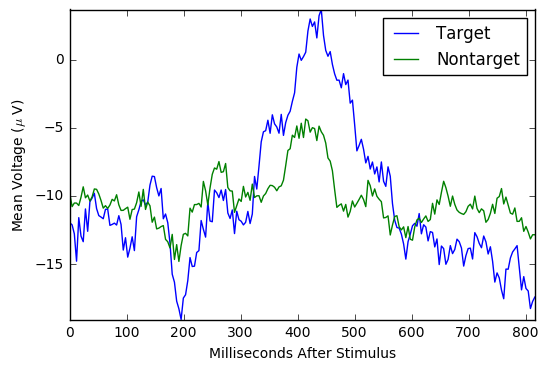

In [36]:
targetMean = np.mean(segments[targetSegments,:,5],axis=0)

nontargetMean = np.mean(segments[targetSegments==False,:,5],axis=0)

plt.clf();

xs = np.arange(len(targetMean)) / 256.0 * 1000  # milliseconds

plt.plot(xs, np.vstack((targetMean,nontargetMean)).T);

plt.legend(('Target','Nontarget'));

plt.axis('tight');

plt.xlabel('Milliseconds After Stimulus');

plt.ylabel('Mean Voltage ($\mu$ V)');